### Mohamad Quteifan
### Professor Catie Williams
### DSC 680: Applied Data Science
### Project Draft

# Project Proposal
The purpose of the research is to create a model that will effectively predict which patients will have a heart stroke. The model that will be utilized is still under review and model evolution will be an essential to providing insight on the data. 

This has an opportunity to save lives if the model is effective.
List of possible questions:
1. What is the most significant factor in heart strokes?
2. Average age for heart strokes?
3. Are the features presented in the data significant enough to produce an effective model?
4. Is Machine Learning the best method to tackle heart strokes? 
5. Do married patients at a higher risk of heart strokes compared to unmarried patience?
6. How important is BMI to heart strokes? 
7. What is the most important feature in the data?
8. Do the job types of the patients have an impact/relationship with strokes?
9. How many patients in the data has had a stroke?
10. What is the average glucose level of stroke patients?
 

# Exploratory Data Analysis

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
from scipy import stats
!pip install missingno
import warnings
import time
import pickle
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, f1_score, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from scipy import stats
!pip install pandas_profiling
import pandas_profiling

warnings.filterwarnings('ignore')
import pip
#pip.main(['install', 'xgboost'])
import sys
#!{sys.executable} -m pip install xgboost
#import xgboost as xgb
import missingno as msno 
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import RandomForest, LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

#from xgboost import XGBClassifier, XGBRegressor
#import xgboost as xgb


In [213]:
# import dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [214]:
print("The shape of the data:\n",
      df.shape, 
      "\nThe first 5 rows are:\n", 
      df.head(), 
      "\nThe last 5 rows are:\n",
      df.tail(), 
      "\nThe column names are:\n",
      df.columns)

The shape of the data:
 (5110, 12) 
The first 5 rows are:
       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [215]:
# pd.profile_report
df.profile_report()

### Missing Data/Empty Values

In [216]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The data is relatively clean, and the only feature that is missing values is the value BMI. 

#### Mean imputations, use the Mean inpace of the 201 BMI missing values

In [217]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Remove ID feature from the data

In [218]:
print("Shape before dropping", df.shape)
df = df.drop(columns ='id')
print("Shape after dropping", df.shape)

Shape before dropping (5110, 12)
Shape after dropping (5110, 11)


#### Gender

In [219]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

There are a few more female patients than male patients. This may be an issue in modeling we have to continue to review the data. I will be removing the value "other", there is only one individual who goes by anything other than other and it will not be useful in the research. Nothing against people who identify as anything outside the two genders, just for the sake of modeling including the "other" value would not be beneficial. 

In [220]:
# Drop other
df = df[df.gender != "Other" ]
df.shape


(5109, 11)

In [221]:
#This technique was taken from a medium article that I have linked in the reference section

df_cat = ['gender','hypertension','heart_disease','ever_married',
          'work_type','Residence_type','smoking_status', 'stroke']


### Gender

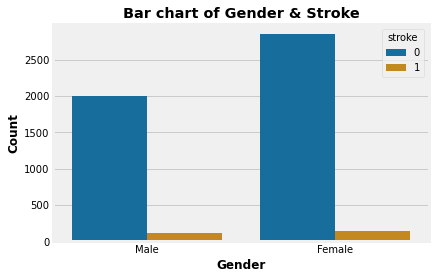

In [222]:
sns.countplot(x=df["gender"], data=df, hue =df['stroke'], palette = 'colorblind')
plt.title("Bar chart of Gender & Stroke", weight='bold')
plt.xlabel('Gender', weight = 'bold')
plt.ylabel('Count', weight='bold')
plt.show()

#### Quick Analysis 
Not much can be concluded from this information. It shows that females are slighty at a higher risk of suffering a stroke, but this should not be taken as evidence considering that the data consisted of more females. 

### Hypertension

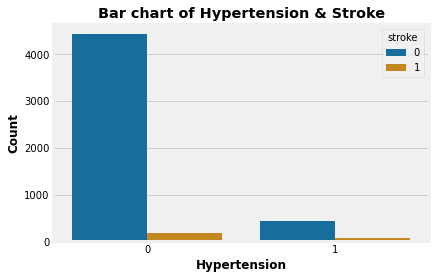

In [223]:
sns.countplot(x=df["hypertension"], data=df, hue =df['stroke'], palette = 'colorblind')
plt.title("Bar chart of Hypertension & Stroke", weight='bold')
plt.xlabel('Hypertension', weight = 'bold')
plt.ylabel('Count', weight='bold')
plt.show()

#### Analysis of the relationship between hypertension and stroke
There seems to be a strong relationship between the two variables. The patients who were diagnosed with hypertension were likily to have a heart stroke. This does not come as a surprise to anyone and it makes sense. 

### Heart Disease

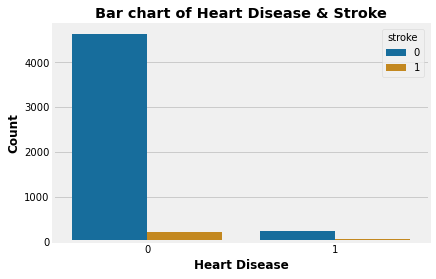

In [224]:
sns.countplot(x=df["heart_disease"], data=df, hue =df['stroke'], palette = 'colorblind')
plt.title("Bar chart of Heart Disease & Stroke", weight='bold')
plt.xlabel("Heart Disease",weight='bold')
plt.ylabel("Count",weight='bold')
plt.show()

#### Analysis on the relationship between the Heart Disease and stroke
The feature is nearly identical to the other feature hypertension. The biggest difference is that heart diseases seems to have an even more significant impact on stroke. We can conclude that individuals with a heart disease are more likely to suffer a stroke than an ordinary individual(if all other metrics are the same) 

### Married

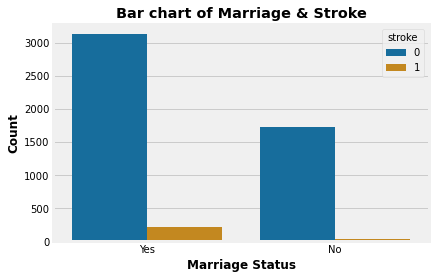

In [225]:
sns.countplot(x=df["ever_married"], data=df, hue =df['stroke'], palette = 'colorblind')
plt.title("Bar chart of Marriage & Stroke", weight='bold')
plt.xlabel("Marriage Status",weight='bold')
plt.ylabel("Count",weight='bold')
plt.show()

#### Analysis on the relationship between the Marriage and stroke
Married individuals are more likely to sufffer a stroke compared to the never married individuals. I do want to point out that there are quite a few more married individuals which could mean that the conclusion may not be reliable.

### Work Type

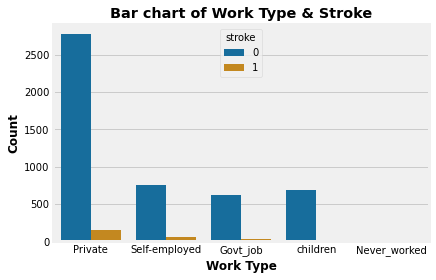

In [226]:
sns.countplot(x=df["work_type"], data=df, hue =df['stroke'], palette = 'colorblind')
plt.title("Bar chart of Work Type & Stroke", weight='bold')
plt.xlabel('Work Type', weight = 'bold')
plt.ylabel('Count', weight='bold')
plt.show()

#### Analysis on the relationship between the Work Type and stroke
The analysis concluded that the individuals who were self employed or working in a private sector were at a much higher chance of suffering a stroke. The one main issue with the finding is that majority of the patients in the study worked in the private sector and the unequal distribution lead to the conclusion. We can conclude with confidence that self-employed patients are at the highest risk of suffering a stroke.

### Residence_type

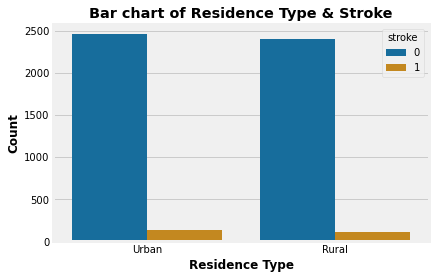

In [227]:
sns.countplot(x=df["Residence_type"], data=df, hue =df['stroke'], palette = 'colorblind')
plt.title("Bar chart of Residence Type & Stroke", weight='bold')
plt.xlabel('Residence Type', weight = 'bold')
plt.ylabel('Count', weight='bold')
plt.show()

#### Analysis on the relationship between the Residence Type and stroke
I was not surprised to find that there is not relationship between Residence Type and stroke. The patients who lived in an Urban area were equally likely to get a stroke as the patients living in Rural areas. 

### Smoking_status

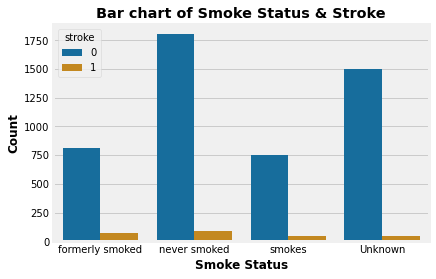

In [228]:
sns.countplot(x=df["smoking_status"], data=df, hue =df['stroke'], palette = 'colorblind')
plt.title("Bar chart of Smoke Status & Stroke", weight='bold')
plt.xlabel('Smoke Status', weight = 'bold')
plt.ylabel('Count', weight='bold')
plt.show()

#### Analysis on the relationship between the Smoking Status and Stroke
At first glance it seemed that patients who never smoked were likely to suffer a stroke at a higher rate than patients who formerly or currently smoke because of how the data is distributed. The analysis actually concludes that former and current smokers are at a higher risk of heart stroke, which we expected. 

### Quantitative Features

In [229]:
df_quat = [ "age", "avg_glucose_level", "bmi"]

### Age

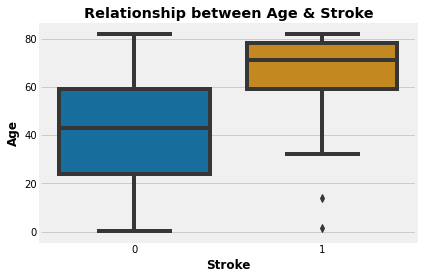

In [230]:
sns.boxplot(x="stroke", y= "age", data=df,  palette = 'colorblind')
plt.title("Relationship between Age & Stroke", weight='bold')
plt.xlabel("Stroke", weight = 'bold')
plt.ylabel("Age", weight='bold')
plt.show()

#### Analysis on the relationship between the Age and Stroke
The chart indicates that the older you are, the more likely you are to suffer a stroke. The mean age for the stroke patients is much higher than the mean for the non-stroke patients. This indicates a clear relationship between age and the dependent variable. 

### Average Glucose Level

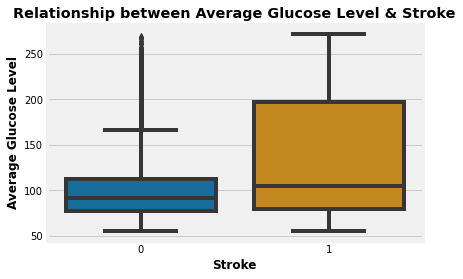

In [231]:
sns.boxplot(x="stroke", y= "avg_glucose_level", data=df,  palette = 'colorblind')
plt.title("Relationship between Average Glucose Level & Stroke", weight='bold')
plt.xlabel("Stroke", weight = 'bold')
plt.ylabel("Average Glucose Level", weight='bold')
plt.show()

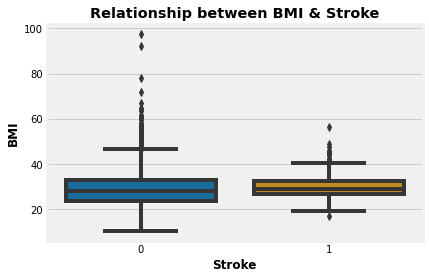

In [232]:
sns.boxplot(x="stroke", y= "bmi", data=df,  palette = 'colorblind')
plt.title("Relationship between BMI & Stroke", weight='bold')
plt.xlabel("Stroke", weight = 'bold')
plt.ylabel("BMI", weight='bold')
plt.show()

#### Analysis on the relationship between the Residence Type and stroke
I was unable to conclude anything from the data, it shows that the patients without a stroke contain a few outliers (individuals with a BMI greater than 55). The data in the BMI for patients without a stroke varies significantly compared to the patients with a stroke. The data points that are greater than 48 (above the 3 IQR) are considered outliers and we will need to remove the outliers from the data. Also, 48 is the highest a BMI can get based on https://www.medicalnewstoday.com/articles/323586#cutoff-points this health article. BMI 48 is considered super obese. 

In [233]:
outliers=df.loc[df['bmi']>48]
outliers.shape


(103, 11)

In [234]:
### Replace outliers in BMI feature. 
df["bmi"] = pd.to_numeric(df["bmi"])
df["bmi"] = df["bmi"].apply(lambda x: 48 if x>48 else x)


# Outlier removal for Quantitative Features

In [235]:
from sklearn.ensemble import IsolationForest
isolation = IsolationForest(n_estimators = 1000, contamination = 0.03)
out = pd.Series(isolation.fit_predict(df[['bmi', 'avg_glucose_level']]),
                 name = 'outliers')
out.value_counts()
df = pd.concat([out.reset_index(), df.reset_index()], axis = 1,
               ignore_index = False).drop(columns = 'index')
df = df[df['outliers'] == 1]
df['stroke'].value_counts()


0    4723
1     232
Name: stroke, dtype: int64

# Stroke, Unbalanced Data Set

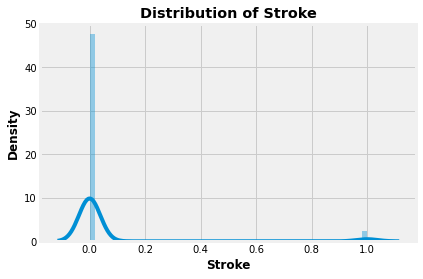

In [236]:
sns.distplot(df.stroke)
plt.title("Distribution of Stroke", weight='bold')
plt.xlabel('Stroke', weight = 'bold')
plt.ylabel("Density", weight = "bold")
plt.show()

### Analysis Stroke
We clearly see an imbalance in the data. Although the outlier detection in BMI and average glucose level reduce the imbalance it is still significant and needs to be transformed to produce an effective model. The model that is created now will more than likely predict that all patients will not have a stroke which is incorrected and defeats the purpose of the research. 

In [237]:
#Balancing Stroke data 
scaler = StandardScaler()
df[df_quat] = scaler.fit_transform(df[df_quat])

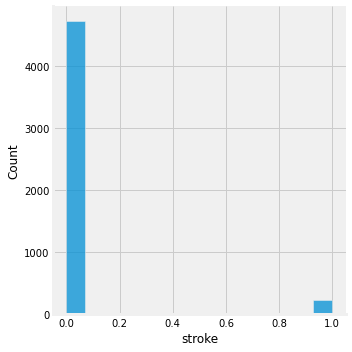

In [238]:
sns.displot(df.stroke)
plt.show()

# Modeling

In [239]:
## I forgot to label encode the categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])

df_encoded = df
df_encoded.head()

,outliers,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1,1.062297,0,1,1,2,1,3.037211,1.184748,1,1
1,1,0,0.797176,0,0,1,3,0,2.396832,0.060334,2,1
2,1,1,1.636727,0,1,1,2,0,0.068205,0.586559,2,1
3,1,0,0.266934,0,0,1,2,1,1.647628,0.863769,3,1
4,1,0,1.592540,1,0,1,3,0,1.717519,-0.653588,2,1


In [240]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

from imblearn.over_sampling import RandomOverSampler
def classification_eval(y_test, y_pred):
    print(f'accuracy  = {np.round(accuracy_score(y_test, y_pred), 3)}')
    print(f'precision = {np.round(precision_score(y_test, y_pred), 3)}')
    print(f'recall    = {np.round(recall_score(y_test, y_pred), 3)}')
    print(f'f1-score  = {np.round(f1_score(y_test, y_pred), 3)}')
    print(f'roc auc   = {np.round(roc_auc_score(y_test, y_pred), 3)}')
    print(f'null accuracy = {round(max(y_test.mean(), 1 - y_test.mean()), 2)}')



X = df_encoded.drop(columns = ['stroke', 'outliers'])
y = df_encoded.stroke


oversampler = RandomOverSampler()
X, y = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                             stratify = y)
randomf = RandomForestClassifier()
randomf.fit(X_train, y_train)
y_pred = randomf.predict(X_test)

classification_eval(y_test, y_pred)

accuracy  = 0.994
precision = 0.988
recall    = 1.0
f1-score  = 0.994
roc auc   = 0.994
null accuracy = 0.5


In [241]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                             stratify = y)
randomf = RandomForestClassifier()
randomf.fit(X_train, y_train)
y_pred = randomf.predict(X_test)
classification_eval(y_test, y_pred)

accuracy  = 0.992
precision = 0.983
recall    = 1.0
f1-score  = 0.992
roc auc   = 0.992
null accuracy = 0.5


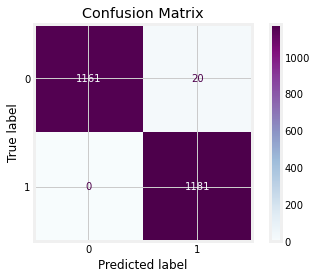

In [242]:
plot_confusion_matrix(randomf, X_test, y_test, cmap = "BuPu")
plt.title("Confusion Matrix" )
plt.show()